In [1]:
print("Image classification project")

Image classification project


In [ ]:
###
vgg16
vgg19
resnet
inception(google net)
mobile net
nasnet
effient net

In [9]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import ResNet50

In [24]:
from tensorflow.keras.preprocessing import image

In [30]:
from tensorflow.keras.applications.vgg16 import preprocess_input,decode_predictions

In [10]:
import numpy as np

In [11]:
model=VGG16(weights='imagenet')

553467096/553467096 [==============================] - 5s 0us/step


In [12]:
img_path="/content/download.jpg"

In [13]:
img=image.load_img(img_path,target_size=(224,224))

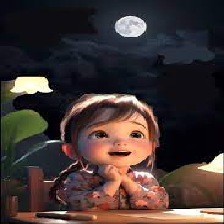

In [14]:
img

In [16]:
img=image.img_to_array(img)

In [17]:
img.shape

(224, 224, 3)

In [19]:
img=np.expand_dims(img,axis=0)

In [20]:
img.shape

(1, 224, 224, 3)

In [21]:
prediction=model.predict(img)

1/1 [==============================] - 3s 3s/step


In [31]:
decode_predictions(prediction)

35363/35363 [==============================] - 0s 0us/step


[[('n02948072', 'candle', 0.1258088),
  ('n09229709', 'bubble', 0.11235059),
  ('n04399382', 'teddy', 0.07815246),
  ('n04462240', 'toyshop', 0.07094802),
  ('n02776631', 'bakery', 0.061074223)]]

In [32]:
model2=ResNet50(weights='imagenet')

102967424/102967424 [==============================] - 0s 0us/step


In [34]:
img=preprocess_input(img)

In [35]:
predictions=model2.predict(img)

1/1 [==============================] - 2s 2s/step


In [36]:
decode_predictions(predictions)

[[('n03179701', 'desk', 0.06366452),
  ('n03935335', 'piggy_bank', 0.048899338),
  ('n02948072', 'candle', 0.034582935),
  ('n03877472', 'pajama', 0.030453203),
  ('n04081281', 'restaurant', 0.022440858)]]

In [37]:
#finetuning of the pre training model

In [52]:
conv_base=VGG16(weights="imagenet",include_top=False,input_shape=(150,150,3))

In [54]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [55]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [56]:
model=Sequential()

In [57]:
model.add(conv_base)
model.add(Flatten())
model.add(Dense(265,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [58]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 265)               2171145   
                                                                 
 dense_1 (Dense)             (None, 1)                 266       
                                                                 
Total params: 16886099 (64.42 MB)
Trainable params: 16886099 (64.42 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [59]:
conv_base.trainable=False

In [63]:
conv_base.layers

In [65]:
len(conv_base.layers)

19

In [68]:
conv_base.layers[1].name

'block1_conv1'

In [64]:
for layer in conv_base.layers:
  print(layer.name)

input_4
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_pool


In [70]:
conv_base.trainable=True
set_trainable=False
for layer in conv_base.layers:
  if layer.name=="block5_conv1":
    set_trainable=True
  if set_trainable:
    layer.trainable=True
  else:
    layer.trainable=False

In [71]:
model=Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(265,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [72]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(train_ds,epochs=1,validation_data=validation_ds)